## Test Options Prices

In [1]:
import numpy as np
import pandas as pd 
import pandas_datareader.data as web
from pandas_datareader.data import Options
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date
import math

In [2]:
# Financial calculations 

# Defines a Normal CDF
def csnd(dval):
    return (1.0 + math.erf(dval/math.sqrt(2.0)))/2.0

# Returns a numpy array of the continuous growth rate
def contGrowthRate(prices):
    dcgr = np.zeros( (len(prices)-1, 1) )
    for i in range(len(prices)-1):
        dcgr[i] = np.log(prices[i+1] / prices[i])
    return dcgr

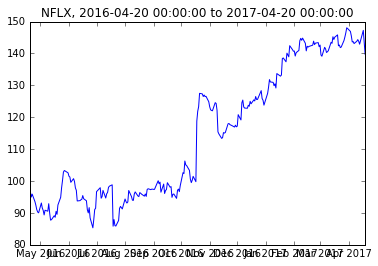

In [6]:
symbol = "NFLX"
start = datetime.datetime(2016, 4, 20)
end = datetime.datetime(2017, 4, 20)
stock = web.DataReader(symbol, 'yahoo', start, end)
prices = stock['Adj Close']

plt.plot(prices)
plt.title('%s, %s to %s' % (symbol, str(start), str(end)))
plt.show()

In [20]:
# Import options data for model calibration
options_sym = Options(symbol, 'yahoo')
options_sym.expiry_dates
options_data = options_sym.get_all_data()
#options_data[(options_data['Strike'] > 130) and (options_data['Strike'] < 150)]

In [21]:
options_data.loc[(slice(135,155))]

Last    Bid    Ask       Chg  \
Strike Expiry     Type Symbol                                               
135.0  2017-04-21 call NFLX170421C00135000   6.45   5.95   6.80  2.050000   
                  put  NFLX170421P00135000   0.02   0.01   0.05 -0.080000   
       2017-05-05 call NFLX170505C00135000   7.50   6.90   7.40  1.930000   
                  put  NFLX170505P00135000   0.90   0.74   0.86 -0.330000   
       2017-05-12 call NFLX170512C00135000   7.72   7.35   7.65  0.240000   
                  put  NFLX170512P00135000   1.28   1.18   1.27 -0.770000   
       2017-05-19 call NFLX170519C00135000   7.85   7.70   8.10  1.000000   
                  put  NFLX170519P00135000   1.57   1.56   1.70 -0.590000   
       2017-05-26 call NFLX170526C00135000   8.10   8.10   8.60  1.020001   
                  put  NFLX170526P00135000   1.92   1.90   2.07 -0.730000   
       2017-06-02 call NFLX170602C00135000   9.00   8.45   8.90  1.050000   
                  put  NFLX170602P00135000   3.05   2.76   2.92  1.210000   
       2017-06-16 call NFLX170616C00135000   9.55   9.20   9.55  1.550000   
                  put  NFLX170616P00135000   2.85   2.81   2.97 -0.630000   
       2017-07-21 call NFLX170721C00135000  12.90  12.25  12.70  1.740000   
                  put  NFLX170721P00135000   5.70   5.65   5.95 -1.000000   
       2017-08-18 call NFLX170818C00135000  13.90  13.40  13.80  1.450000   
                  put  NFLX170818P00135000   6.95   6.65   6.95 -0.800000   
       2017-09-15 call NFLX170915C00135000  14.21  14.30  14.70  0.910000   
                  put  NFLX170915P00135000   7.60   7.40   7.65 -0.900000   
       2017-12-15 call NFLX171215C00135000  16.75  17.10  17.50 -5.000000   
                  put  NFLX171215P00135000  10.88  10.65  10.90 -0.020000   
       2018-01-19 call NFLX180119C00135000  19.82  19.60  20.00  1.420000   
                  put  NFLX180119P00135000  12.15  11.95  12.30 -1.000000   
       2018-06-15 call NFLX180615C00135000  25.00  22.00  23.75 -4.000000   
                  put  NFLX180615P00135000  14.95  15.80  16.60  0.000000   
       2019-01-18 call NFLX190118C00135000  29.75  28.75  30.95  1.430000   
                  put  NFLX190118P00135000  21.05  19.65  21.50  1.250000   
136.0  2017-04-21 call NFLX170421C00136000   5.51   4.80   5.85  2.110000   
                  put  NFLX170421P00136000   0.02   0.02   0.03 -0.120000   
...                                           ...    ...    ...       ...   
152.5  2017-05-12 put  NFLX170512P00152500  11.69  11.25  11.85  1.120000   
       2017-05-26 call NFLX170526C00152500   0.90   0.84   0.94  0.200000   
                  put  NFLX170526P00152500  12.42  12.25  12.90  0.000000   
       2017-06-02 call NFLX170602C00152500   1.08   1.05   1.19  0.120000   
155.0  2017-04-21 call NFLX170421C00155000   0.01   0.00   0.01  0.000000   
                  put  NFLX170421P00155000  14.20  13.20  14.05  0.200000   
       2017-05-05 call NFLX170505C00155000   0.11   0.08   0.12  0.020000   
                  put  NFLX170505P00155000  13.50  14.85  15.80  2.000000   
       2017-05-12 call NFLX170512C00155000   0.27   0.20   0.27  0.000000   
                  put  NFLX170512P00155000  12.72  15.15  16.00  0.000000   
       2017-05-19 call NFLX170519C00155000   0.42   0.37   0.44  0.050000   
                  put  NFLX170519P00155000  14.30  13.70  14.30 -1.160000   
       2017-05-26 call NFLX170526C00155000   0.67   0.54   0.65  0.210000   
       2017-06-02 call NFLX170602C00155000   0.73   0.71   0.79  0.060000   
                  put  NFLX170602P00155000  12.72  15.50  16.15  0.000000   
       2017-06-16 call NFLX170616C00155000   1.19   1.14   1.26  0.130000   
                  put  NFLX170616P00155000  14.58  14.45  14.90 -1.370000   
       2017-07-21 call NFLX170721C00155000   3.70   3.60   3.80  0.400000   
       2017-08-18 call NFLX170818C00155000   4.85   4.55   4.75  0.600000   
                  put  NFLX170818P0015500

In [7]:
# Estimate daily volatility
dcgr = contGrowthRate(prices)
dcgr = dcgr[::-1]
print(len(dcgr))

sigma252 = np.std(dcgr)
drift252 = np.mean(dcgr)
print("Annual sigma= %6f" % sigma252)
print("Annual drift= %6f" % drift252)

last60 = dcgr[:60]
sigma60 = np.std(last60)
mean60 = np.mean(last60)
print("60 day sigma=", sigma60)
print("60 day drift=", mean60)

last30 = dcgr[:30]
sigma30 = np.std(last30) 
mean30 = np.mean(last30)
print("30 day sigma=", sigma30)
print("30 day drift=", mean30)

251
Annual sigma= 0.021797
Annual drift= 0.001465
60 day sigma= 0.0115092814597
60 day drift= 0.000285050673215
30 day sigma= 0.0121464343002
30 day drift= -0.000395940516259
